In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load your dataset
df = pd.read_csv('/content/creditcard.csv')  # Replace with your actual file path


In [ ]:
print(df.head())
print(df.info())
print(df.tail())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

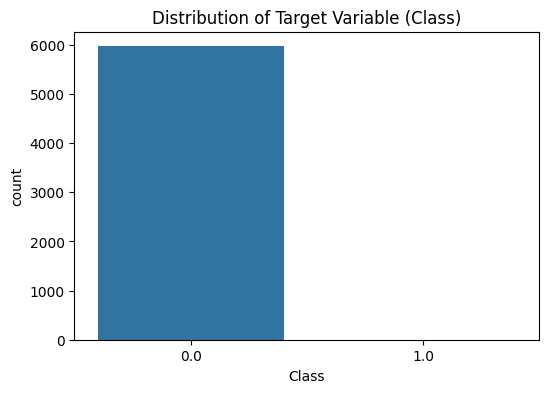

In [ ]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variable (Class)')
plt.show()


In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(['Time', 'Amount', 'Class'], axis=1)), columns=df.columns[1:-2])

# Adding back the 'Time', 'Amount', and 'Class' columns
df_scaled['Time'] = df['Time']
df_scaled['Amount'] = df['Amount']
df_scaled['Class'] = df['Class']



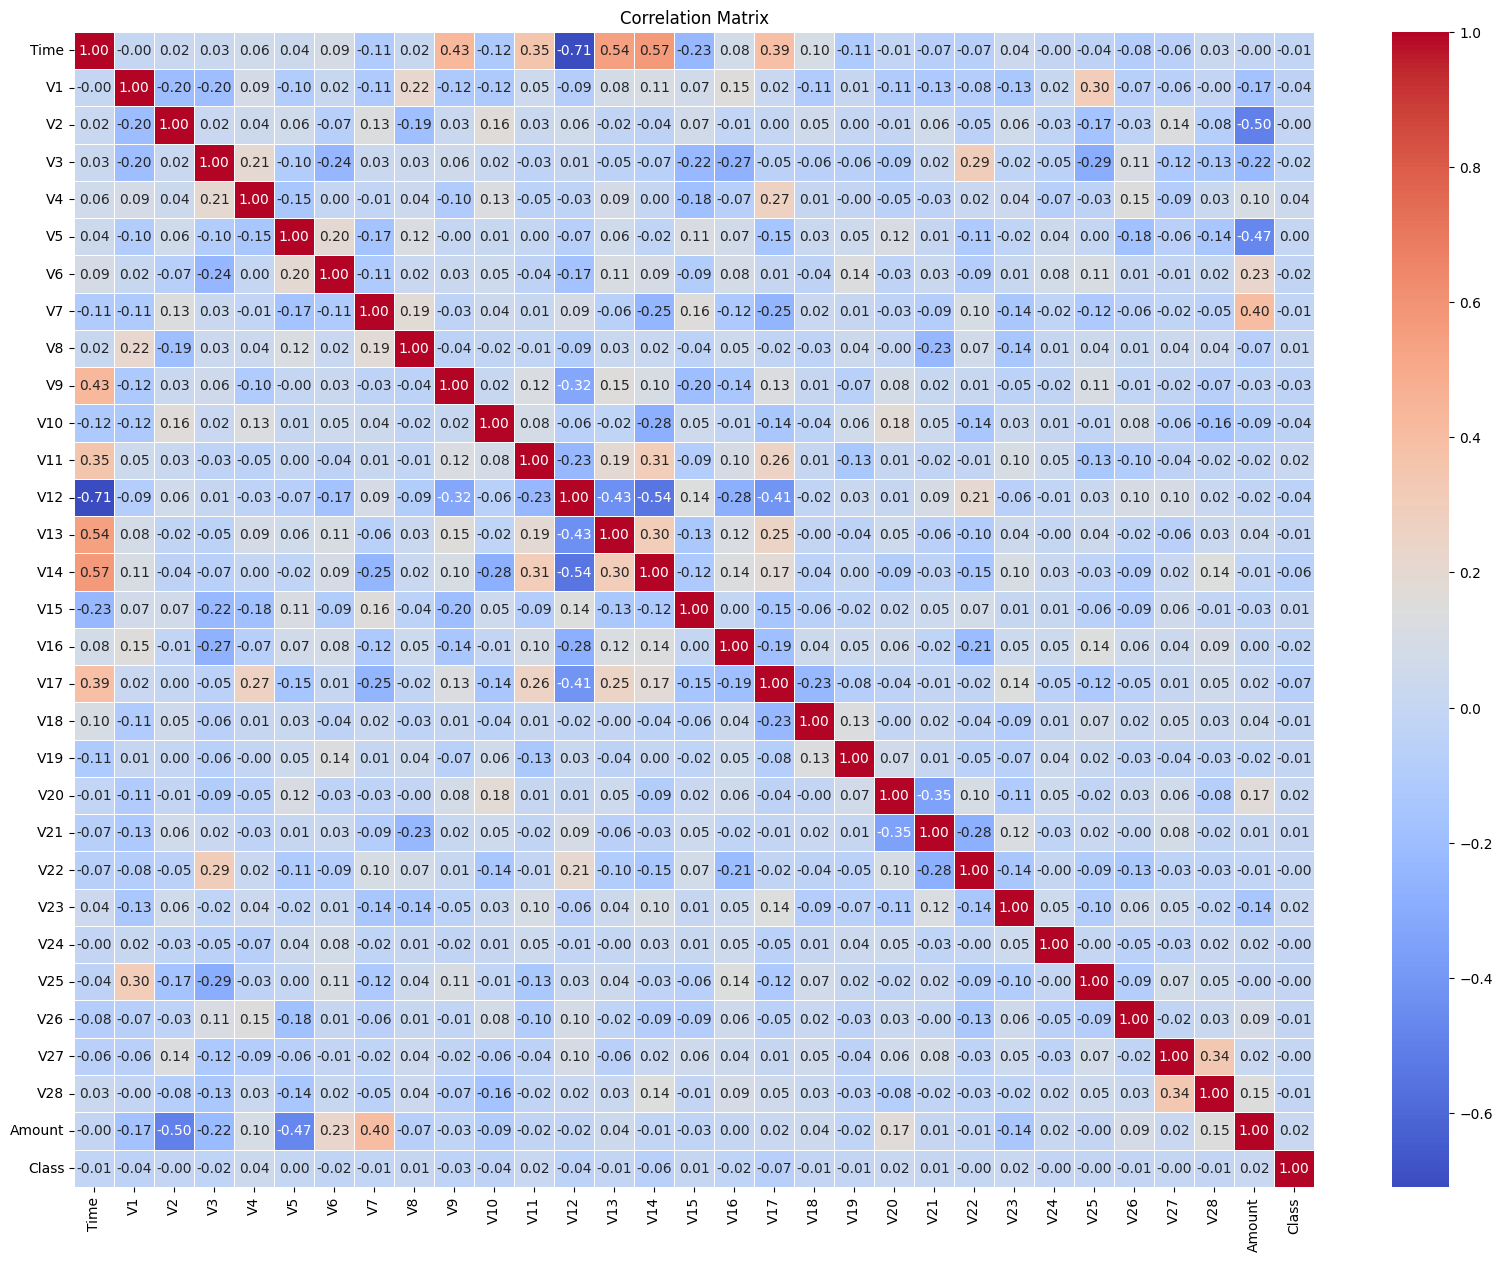

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='virdis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Correlation with target variable
corr_with_target = corr_matrix['Class'].sort_values(ascending=False)
print(corr_with_target)


Class     1.000000
V4        0.043025
V23       0.023886
V11       0.023579
Amount    0.022274
V20       0.021282
V15       0.011644
V21       0.008579
V8        0.005970
V5        0.000083
V22      -0.000547
V27      -0.000569
V24      -0.001782
V25      -0.001859
V2       -0.001872
V18      -0.005445
V19      -0.005500
V26      -0.005962
V13      -0.007063
V28      -0.007861
Time     -0.011397
V7       -0.012015
V6       -0.017247
V16      -0.023274
V3       -0.024730
V9       -0.031878
V10      -0.036398
V1       -0.036739
V12      -0.042333
V14      -0.063887
V17      -0.070258
Name: Class, dtype: float64


In [ ]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check for NaN values in y_train
print("Missing values in y_train:", y_train.isnull().sum())


Missing values in y_train: 1


In [ ]:
# Drop rows with missing target values
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()


In [ ]:
# Fill missing target values with the most frequent class
y_train = y_train.fillna(y_train.mode()[0])


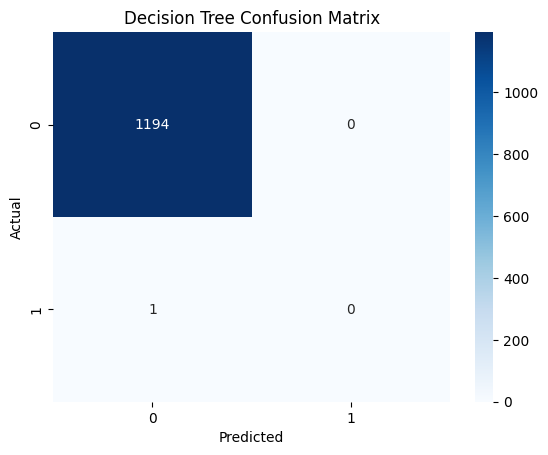

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1194
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195

Accuracy: 0.999163179916318


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = dt_classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
